#### 1 - Import libraries

In [1]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt

#### 2 - Retrieve the names of the 22 files and assign them to a List variable

In [2]:
# retrieve the school files
file_path = os.chdir("/work/data/input_files")
data_files = os.listdir()

# filter out school data files 
csv_files = []

for file in data_files:
    if "MERGED" in file:
        csv_files.append(file)

csv_files

['MERGED2000_01_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2018_19_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2009_10_PP.csv']

#### 3 - Write code to randomly select one file name out of the 22 files names. Display the file name

In [3]:
# randomly select one file 

random_index = random.randrange(len(csv_files))
selected_file =  csv_files[random_index]

print('Selected file:', selected_file)

Selected file: MERGED2010_11_PP.csv


#### 4 - Only read the two columns: college name (INSTNM) and in state tution ("TUITIONFEE_IN")

In [4]:
file = pd.read_csv(selected_file, usecols = ['INSTNM','TUITIONFEE_IN'])
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7470 entries, 0 to 7469
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INSTNM         7470 non-null   object 
 1   TUITIONFEE_IN  4337 non-null   float64
dtypes: float64(1), object(1)
memory usage: 116.8+ KB


#### 5 - Find out how many observations have missing value.


In [5]:
file.isnull().sum()

INSTNM              0
TUITIONFEE_IN    3133
dtype: int64

#### 6 - Drop observations with missing values


In [6]:
file_nan = file.dropna().reset_index(drop = True)
file_nan.shape

(4337, 2)

#### 7 - Find out how many observations have 0 tuition.



In [7]:
file_nan[file_nan['TUITIONFEE_IN'] == 0]

,INSTNM,TUITIONFEE_IN
433,United States Air Force Academy,0.0
1192,United States Naval Academy,0.0
1976,United States Merchant Marine Academy,0.0
1977,United States Military Academy,0.0
1984,Webb Institute,0.0


#### 8 - Drop those observations with 0 tuition. Display the number of observations afterward

In [8]:
clean_file = file_nan[file_nan['TUITIONFEE_IN'] != 0]
clean_file.shape

(4332, 2)

#### 9 - Calculate and display the mean (average) of the tuitions of all the remaining observations


In [9]:
avg_tuition = clean_file['TUITIONFEE_IN'].mean()
avg_tuition

12544.819252077563

#### 10 - Randomly select just 1 observation from the dataframe. Display the tuition of that observation.

In [10]:
school_1 = clean_file.sample()

school_1

,INSTNM,TUITIONFEE_IN
3384,Eastern New Mexico University Ruidoso Branch C...,764.0


#### 11 - Calculate the difference between the tuition of this observation and the mean tuition of all observations calculated earlier. Display the difference.

In [11]:
school_1_diff = avg_tuition - float(school_1['TUITIONFEE_IN'])

print('Difference in tutition and average overall tuitions:', round(school_1_diff, 2))

Difference in tutition and average overall tuitions: 11780.82


#### 12 - Repeat 10 to 11 several times get the feel of the size of the difference in means

Example #1

In [12]:
# randomly select a school

school_2 = clean_file.sample()

# calculate difference between tuition and mean tuition of all schools

school_2_diff = abs(avg_tuition - float(school_2['TUITIONFEE_IN']))

print(school_2)
print('Difference in tutition and average overall tuitions:', round(school_2_diff, 2))

                              INSTNM  TUITIONFEE_IN
179  University of California-Irvine        11232.0
Difference in tutition and average overall tuitions: 1312.82


Example #2

In [13]:
# randomly select a school

school_3 = clean_file.sample()

# calculate difference between tuition and mean tuition of all schools

school_3_diff = abs(avg_tuition - float(school_3['TUITIONFEE_IN']))

print(school_3)
print('Difference in tutition and average overall tuitions:', round(school_3_diff, 2))

                                  INSTNM  TUITIONFEE_IN
3195  University of Puerto Rico-Carolina         2824.0
Difference in tutition and average overall tuitions: 9720.82


#### 13 - Randomly select 20 observations, display the tuition of these observation.

In [14]:
schools_1 = clean_file.sample(20)
schools_1

,INSTNM,TUITIONFEE_IN
1294,Wheelock College,28940.0
778,Lincoln Christian University,13680.0
1378,Western Michigan University,9006.0
3076,West Virginia State University,4544.0
2504,Pennsylvania State University-Penn State Abington,12730.0
1632,Las Vegas College,18576.0
2968,Bon Secours Memorial College of Nursing,6802.0
3004,Clover Park Technical College,4419.0
1894,New York School of Interior Design,18920.0
2610,Francis Marion University,8480.0


#### 14 - Calculate and display the mean tuition of these 20 observations


In [15]:
sample_avg = schools_1['TUITIONFEE_IN'].mean()
print('Average of sample schools tuitions:', sample_avg)

Average of sample schools tuitions: 14084.3


In [16]:
schools_1_diff = abs(avg_tuition - sample_avg)
print('Difference in average of sample tuition and average overall tuition:', round(schools_1_diff, 2))

Difference in average of sample tuition and average overall tuition: 1539.48


#### 16a - Repeat 13 to 15 several times and get the feel of the size of the difference in means 

Example #1

In [17]:
# randomly select 20 schools

schools_2 = clean_file.sample(20)

# calculate average of sample 

sample_avg2 = schools_2['TUITIONFEE_IN'].mean()
sample_avg2

# calculate difference between tuition and mean tuition of all schools

schools_2_diff = abs(avg_tuition - sample_avg2)

print(schools_2)
print('Difference in average of sample tuition and average overall tuition:', round(schools_2_diff, 2))

                                         INSTNM  TUITIONFEE_IN
815                         Rockford University        24750.0
1487                           Tougaloo College         9718.0
448                        Fairfield University        39040.0
634                            Emmanuel College        13520.0
3139          University of Wisconsin-Milwaukee         8151.0
1920                  St Bonaventure University        26895.0
683                        Toccoa Falls College        15885.0
2676                      Cumberland University        18256.0
666             North Georgia Technical College         2310.0
4269        Southeastern College-St. Petersburg        14176.0
853      Grace College and Theological Seminary        21700.0
1643                 Franklin Pierce University        28800.0
515          Florida SouthWestern State College         2682.0
3381                   Hawaii Community College         2246.0
3258       Purdue University Global-Cedar Falls        

Example #2

In [18]:
# randomly select 20 schools

schools_3 = clean_file.sample(20)

# calculate average of sample 

sample_avg3 = schools_3['TUITIONFEE_IN'].mean()
sample_avg3

# calculate difference between tuition and mean tuition of all schools

schools_3_diff = abs(avg_tuition - sample_avg3)

print(schools_3)
print('Difference in average of sample tuition and average overall tuition:', round(schools_3_diff, 2))

                                                 INSTNM  TUITIONFEE_IN
3733              Minnesota School of Business-Plymouth        15660.0
3513    The College of Saints John Fisher & Thomas More        12800.0
538                            Hobe Sound Bible College         5100.0
1511                          Four Rivers Career Center        12193.0
1764                                       Bard College        41670.0
2317                      Northeastern State University         4385.0
2132                  Turtle Mountain Community College         2000.0
3819            Minnesota School of Business-Waite Park        15660.0
1887                                     The New School        36729.0
2973                       Southern Virginia University        17800.0
1894                 New York School of Interior Design        18920.0
2114                        Western Carolina University         5124.0
3849       ITT Technical Institute-Warrensville Heights        18048.0
3679  

#### 16b - Compare these differences with the differences calculated earlier with just 1 observation. Describe your hunch/conclusion.

- The difference between single school and the average tuition of all schools was the highest. 
- The difference between 20 schools and the average tuition of all schools were significantly lower than comparing single tutition. 
- As the number of schools in the sample increased, the differences average tuition of sample schools and average tuition of all schools will decrease. 
- If the sample included all schools listed in the file, the average difference between the sample schools and all schools will be zero.  

#### 17 - Write a function that take two input parameters:

- x (number of observations)
- y (the name of the dataframe).

The function will perform the following:

- Randomly select x observations from y
- Calculate the mean of these x observations
- Calculate the mean of all observations
- Calculate the difference between the two means
- Return the difference

In [19]:
def avg_diff(sample, data):
    all_avg = data.mean()
    random_schools = data.sample(sample)
    random_avg = random_schools.mean()
    diff = abs(all_avg - random_avg)
    print('All Schools:', data, 'Selected Schools:', random_schools, 'Average Difference:', round(float(diff), 2), sep= '\n')    

#### 18 - Test the function by passing a sample size and the name of the dataframe. Display the return of the function

In [20]:
avg_diff(100, clean_file)

All Schools:
                                    INSTNM  TUITIONFEE_IN
0                 Alabama A & M University         5800.0
1      University of Alabama at Birmingham         5806.0
2                       Amridge University         8360.0
3      University of Alabama in Huntsville         7492.0
4                 Alabama State University         7164.0
...                                    ...            ...
4332  Strayer University-Charleston Campus        14085.0
4333             Strayer University-Irving        14085.0
4334               Strayer University-Katy        14085.0
4335  Strayer University-Northwest Houston        14085.0
4336              Strayer University-Plano        14085.0

[4332 rows x 2 columns]
Selected Schools:
                                      INSTNM  TUITIONFEE_IN
4232   Brattleboro Center - Closed July 2013        11132.0
1624                           Union College        18150.0
3907         Platt College-Miller-Motte-Cary        10597.0
1028    

In [21]:
avg_diff(3000, clean_file)

All Schools:
                                    INSTNM  TUITIONFEE_IN
0                 Alabama A & M University         5800.0
1      University of Alabama at Birmingham         5806.0
2                       Amridge University         8360.0
3      University of Alabama in Huntsville         7492.0
4                 Alabama State University         7164.0
...                                    ...            ...
4332  Strayer University-Charleston Campus        14085.0
4333             Strayer University-Irving        14085.0
4334               Strayer University-Katy        14085.0
4335  Strayer University-Northwest Houston        14085.0
4336              Strayer University-Plano        14085.0

[4332 rows x 2 columns]
Selected Schools:
                                                 INSTNM  TUITIONFEE_IN
1510                               Fontbonne University        20380.0
2941                       John Tyler Community College         3275.0
3202          Universidad Ana G. Me

#### 19 - Create a list of sequence numbers from 1 to 50, name it "sample_sizes"; display it to make sure its members are from 1 to 50

In [22]:
sample_sizes = list(range(1,51))
print(sample_sizes)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


#### 20 - Create an empty list and name it "means_diff" for differences of population mean and sample means;
##### Loop through the list sample_sizes:
- For each element in the sample size list, obtain a random sample of that size from the data frame;
- Calculate the sample mean 
- Calculate the difference between the population mean and the sample mean
- Append the difference to the list "means_diff"
- Display the list "means_diff" after the loop is completed

In [23]:
# function to calculate mean 

def calc_avg(input_value):
    avg = sum(input_value) / len(input_value)
    return avg 

In [24]:
means_diff = []

for ele in sample_sizes:
    sample = random.sample(sample_sizes, ele)
    sample_avg = calc_avg(sample)
    avg_diff = abs(calc_avg(sample_sizes) - sample_avg)
    means_diff.append(round(avg_diff,2))
    
print(means_diff)

[7.5, 1.5, 6.17, 4.0, 1.5, 1.0, 0.79, 1.88, 2.61, 6.4, 2.59, 1.25, 3.19, 0.86, 3.77, 0.44, 3.62, 1.39, 4.24, 1.05, 0.69, 2.5, 1.02, 2.0, 1.5, 1.73, 3.43, 1.75, 1.22, 1.17, 1.79, 1.19, 1.05, 0.35, 1.36, 0.36, 0.23, 0.29, 0.73, 2.62, 1.43, 1.86, 0.22, 2.05, 0.1, 0.63, 0.44, 0.67, 0.42, 0.0]


#### 21 - Make a scatter plot with sample size on the x-axs and  mean difference on the y-axis. Observe as the sample size increases, the sample means converge to the population mean.

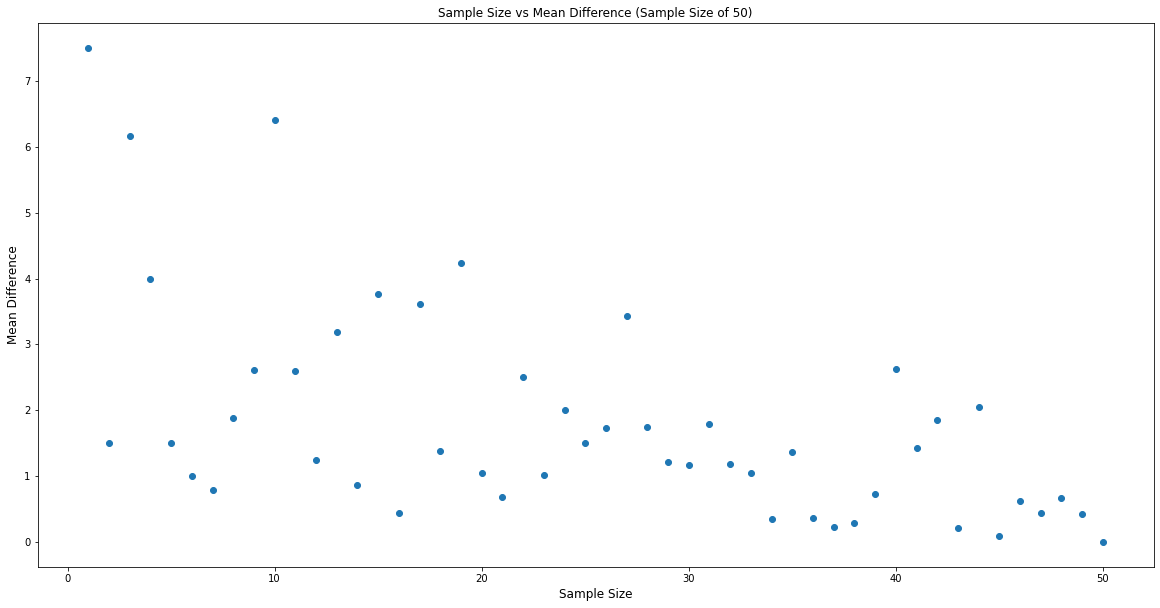

In [25]:
x = sample_sizes
y = means_diff

plt.rcParams["figure.figsize"] = (20,10)

plt.scatter(x, y)
plt.title("Sample Size vs Mean Difference (Sample Size of 50)", fontsize = 12)
plt.xlabel("Sample Size", fontsize = 12)
plt.ylabel("Mean Difference", fontsize = 12)
plt.show()

#### 22 - repeat 18 to 21 by replacing 50 with a larger number. For example, 300, or even 1000 and see how the plot looks.

Example #1

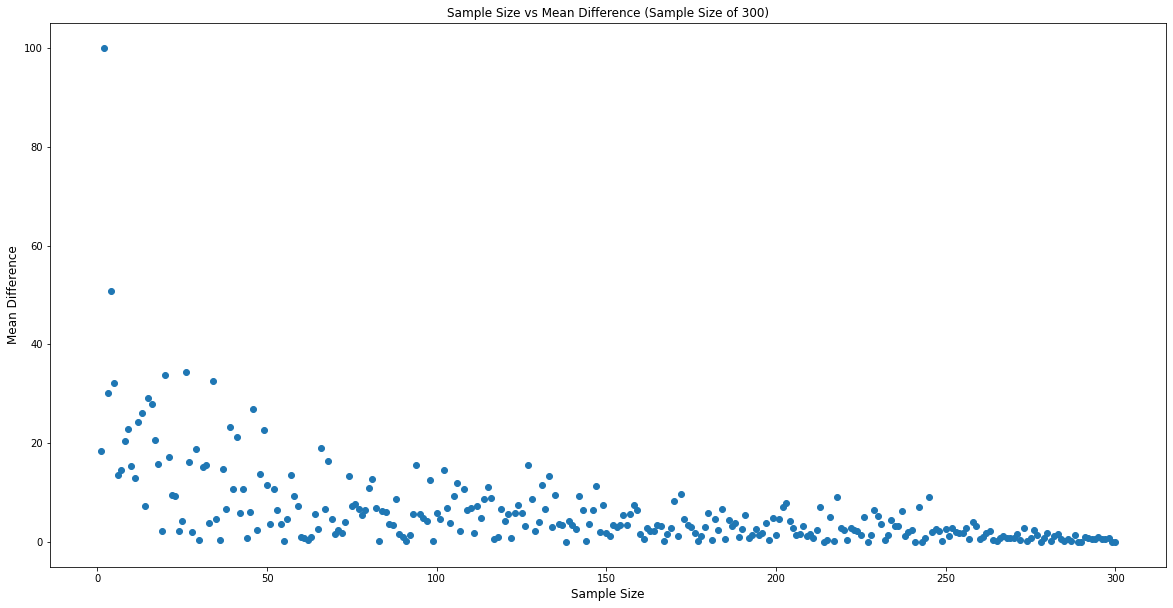

In [26]:
# sample size of 300

sample_sizes_300 = list(range(1,301))

means_diff_300 = []

for ele_300 in sample_sizes_300:
    sample_300 = random.sample(sample_sizes_300, ele_300)
    sample_avg_300 = calc_avg(sample_300)
    avg_diff_300 = abs(calc_avg(sample_sizes_300) - sample_avg_300)
    means_diff_300.append(round(avg_diff_300,2))
    
x = sample_sizes_300
y = means_diff_300

plt.scatter(x, y)
plt.title("Sample Size vs Mean Difference (Sample Size of 300)", fontsize = 12)
plt.xlabel("Sample Size", fontsize = 12)
plt.ylabel("Mean Difference", fontsize = 12)
plt.show()

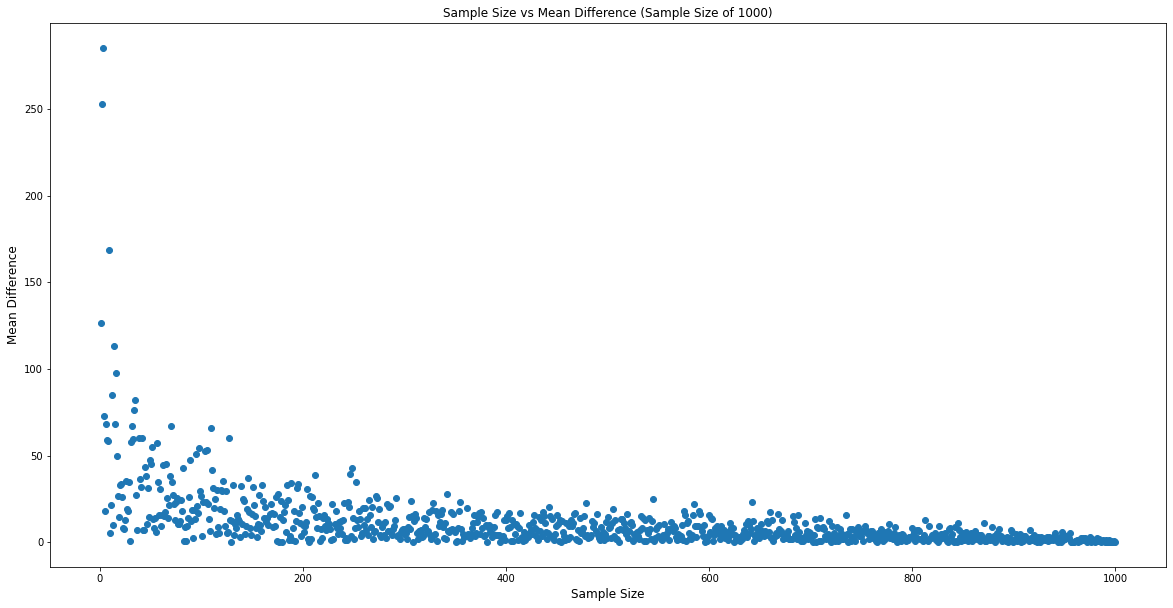

In [27]:
# sample size of 1000

sample_sizes_1000 = list(range(1,1001))

means_diff_1000 = []

for ele_1000 in sample_sizes_1000:
    sample_1000 = random.sample(sample_sizes_1000, ele_1000)
    sample_avg_1000 = calc_avg(sample_1000)
    avg_diff_1000 = abs(calc_avg(sample_sizes_1000) - sample_avg_1000)
    means_diff_1000.append(round(avg_diff_1000,2))
    
x = sample_sizes_1000
y = means_diff_1000

plt.scatter(x, y)
plt.title("Sample Size vs Mean Difference (Sample Size of 1000)", fontsize = 12)
plt.xlabel("Sample Size", fontsize = 12)
plt.ylabel("Mean Difference", fontsize = 12)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b0a73dad-e3e1-4483-bec0-91e90772d4b2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>